# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
!pip install --user --upgrade tables
!pip install --user pycaret

In [2]:
# !pip install pycaret[full]==2.3.4
# !pip install pycaret

In [3]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import joblib
import pycaret
print("Joblib version:", joblib.__version__)
print("PyCaret version:", pycaret.__version__)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Joblib version: 1.3.2
PyCaret version: 3.3.2


# get libs

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [6]:
csv_file_path = '/content/drive/MyDrive/MS thesis/HFCAI/BARMM/barmm_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False)

,ID,bg_id,barangay_name,city_name,province_name,region_name,RHU_Presence,Road_Presence,POI_Presence,buildability_landcov,...,drought_value,flood_probability_value,rain intensity_value,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
539,3334468,bg-37136,Lumbac,Binidayan,Lanao del Sur,Autonomous Region In Muslim Mindanao (ARMM),0,1,1,1.0,...,0.639380,0.112316,1.106916,79.079498,5.548628,519.792572,263.343179,128.364228,96.784840,0.635467
487,3324795,bg-37701,Porug,Pualas,Lanao del Sur,Autonomous Region In Muslim Mindanao (ARMM),0,1,1,1.0,...,0.727157,0.109398,0.975271,26.127884,5.121439,141.583224,70.154279,32.767754,25.708059,0.634995
567,3338630,bg-38118,Daguan,Kapatagan,Lanao del Sur,Autonomous Region In Muslim Mindanao (ARMM),0,1,1,1.0,...,0.738833,0.118986,0.959977,11.287584,1.847088,70.598736,34.067952,17.034048,14.571216,0.634317
686,3359325,bg-38104,Kianibong,Tagoloan Ii,Lanao del Sur,Autonomous Region In Muslim Mindanao (ARMM),1,1,1,1.0,...,0.797618,0.154539,1.006261,13.671180,0.448245,117.661905,60.063615,23.980635,15.688260,0.626222
528,3331703,bg-37134,Ingud,Binidayan,Lanao del Sur,Autonomous Region In Muslim Mindanao (ARMM),0,1,0,1.0,...,0.647501,0.088207,1.113930,14.448720,17.848400,154.686240,68.843880,34.846920,35.980120,0.599855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,3358012,bg-38482,Talitay,Talitay,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,1.350125,0.434999,0.771746,15.724692,0.879012,119.644236,63.582354,28.030914,19.729116,0.353724
692,3360772,bg-38606,Montay,Northern Kabuntalan,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,1.343102,0.459339,0.754531,14.023292,4.359768,152.677952,72.442352,37.794550,33.917800,0.353665
731,3369057,bg-38607,Paulino Labio,Northern Kabuntalan,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),1,0,0,0.0,...,1.439156,0.403463,0.767406,0.291648,0.223692,3.983948,1.996224,1.107124,0.897592,0.349852
722,3366293,bg-38607,Paulino Labio,Northern Kabuntalan,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,1.439156,0.403463,0.767406,3.718512,2.852073,50.795337,25.451856,14.115831,11.444298,0.349852


In [7]:
for i in df.columns:
  print(i)

ID
bg_id
barangay_name
city_name
province_name
region_name
RHU_Presence
Road_Presence
POI_Presence
buildability_landcov
Nearest_RHU
Distance_to_Nearest_RHU_km
drought_value
flood_probability_value
rain intensity_value
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

In [8]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,2708537
1,2720913
2,2720914
3,2722294
4,2722295
...,...
747,3410548
748,3411930
749,3411931
750,3413311


In [9]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(752, 1)"
2,Transformed data shape,"(752, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


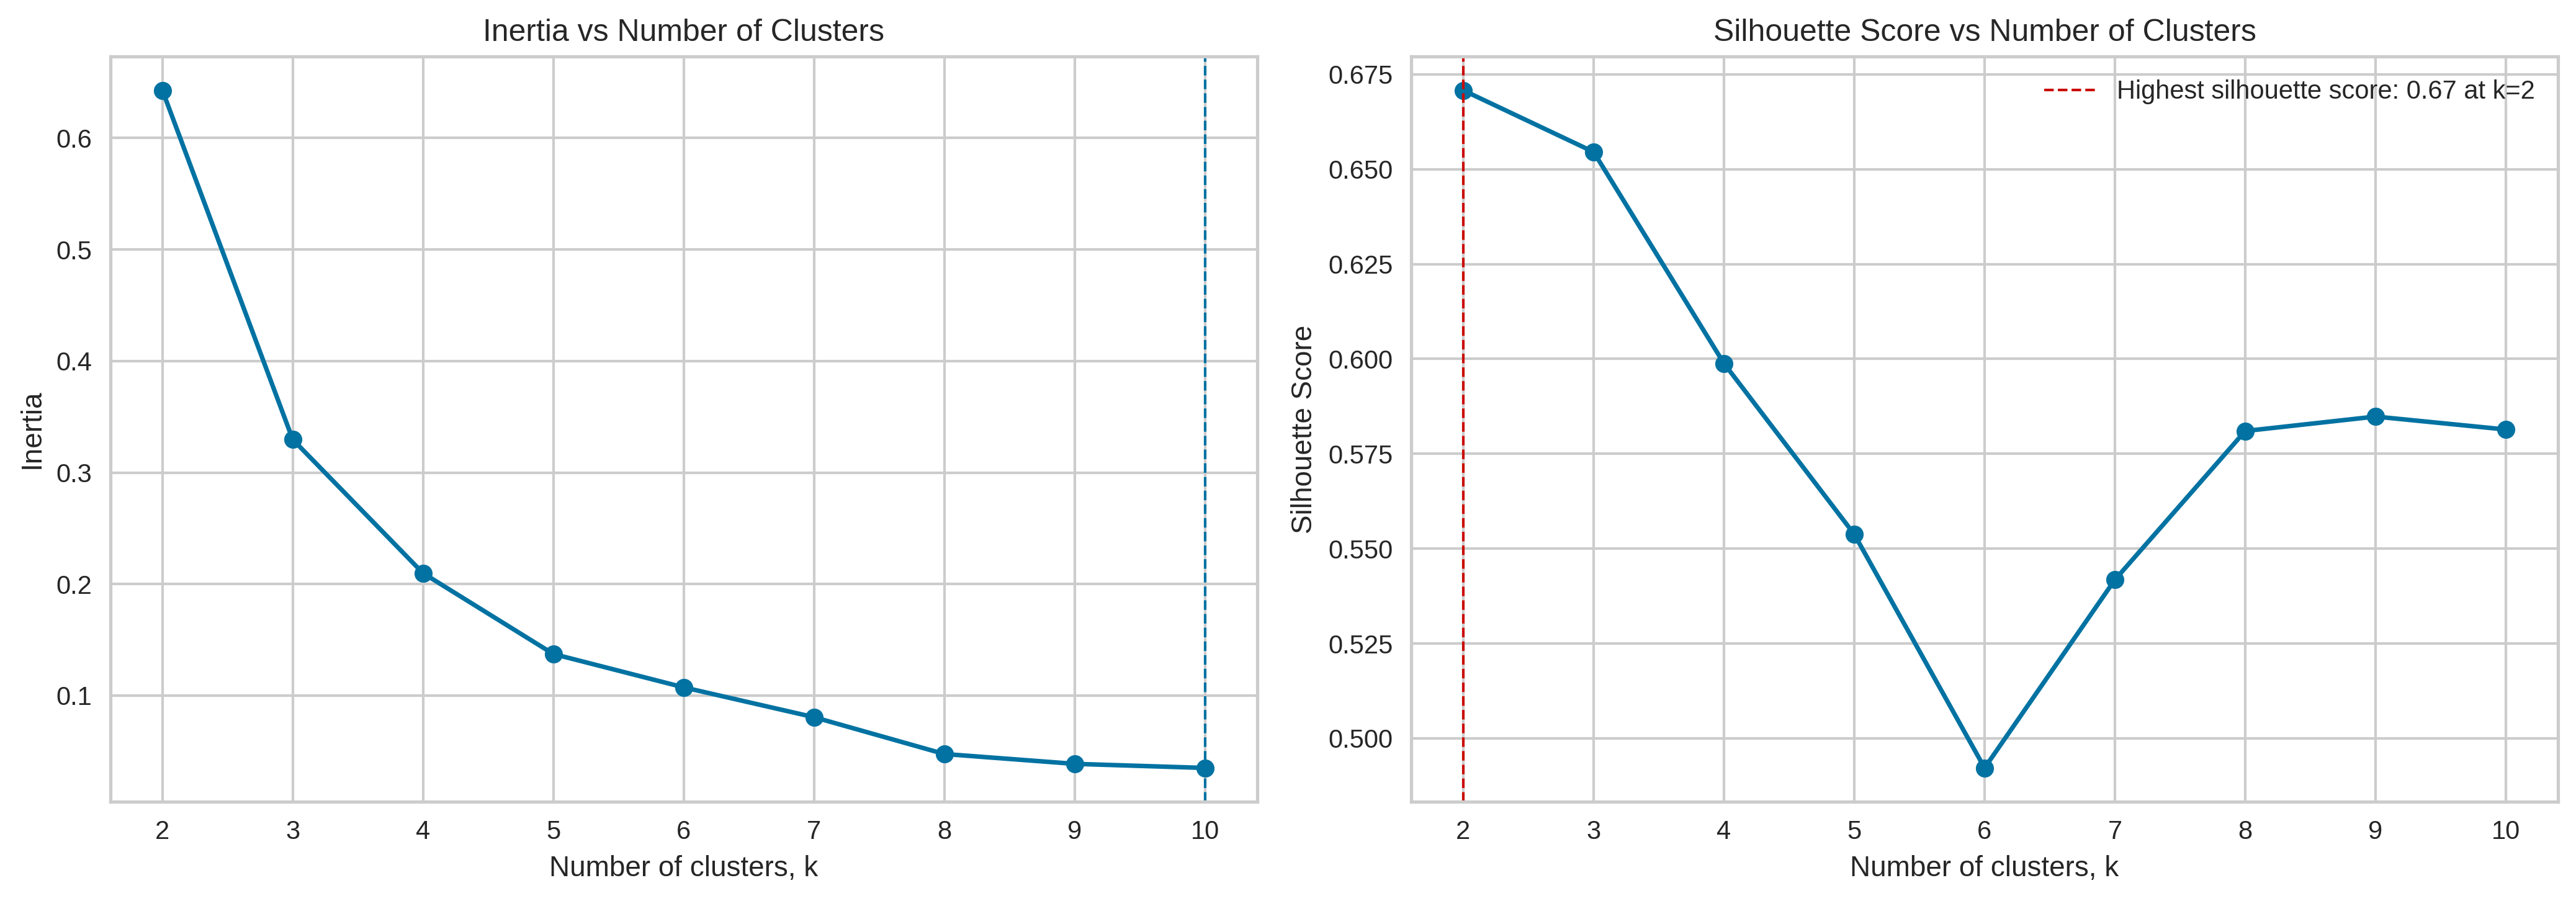

In [16]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5899,2683.1530,0.5324,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

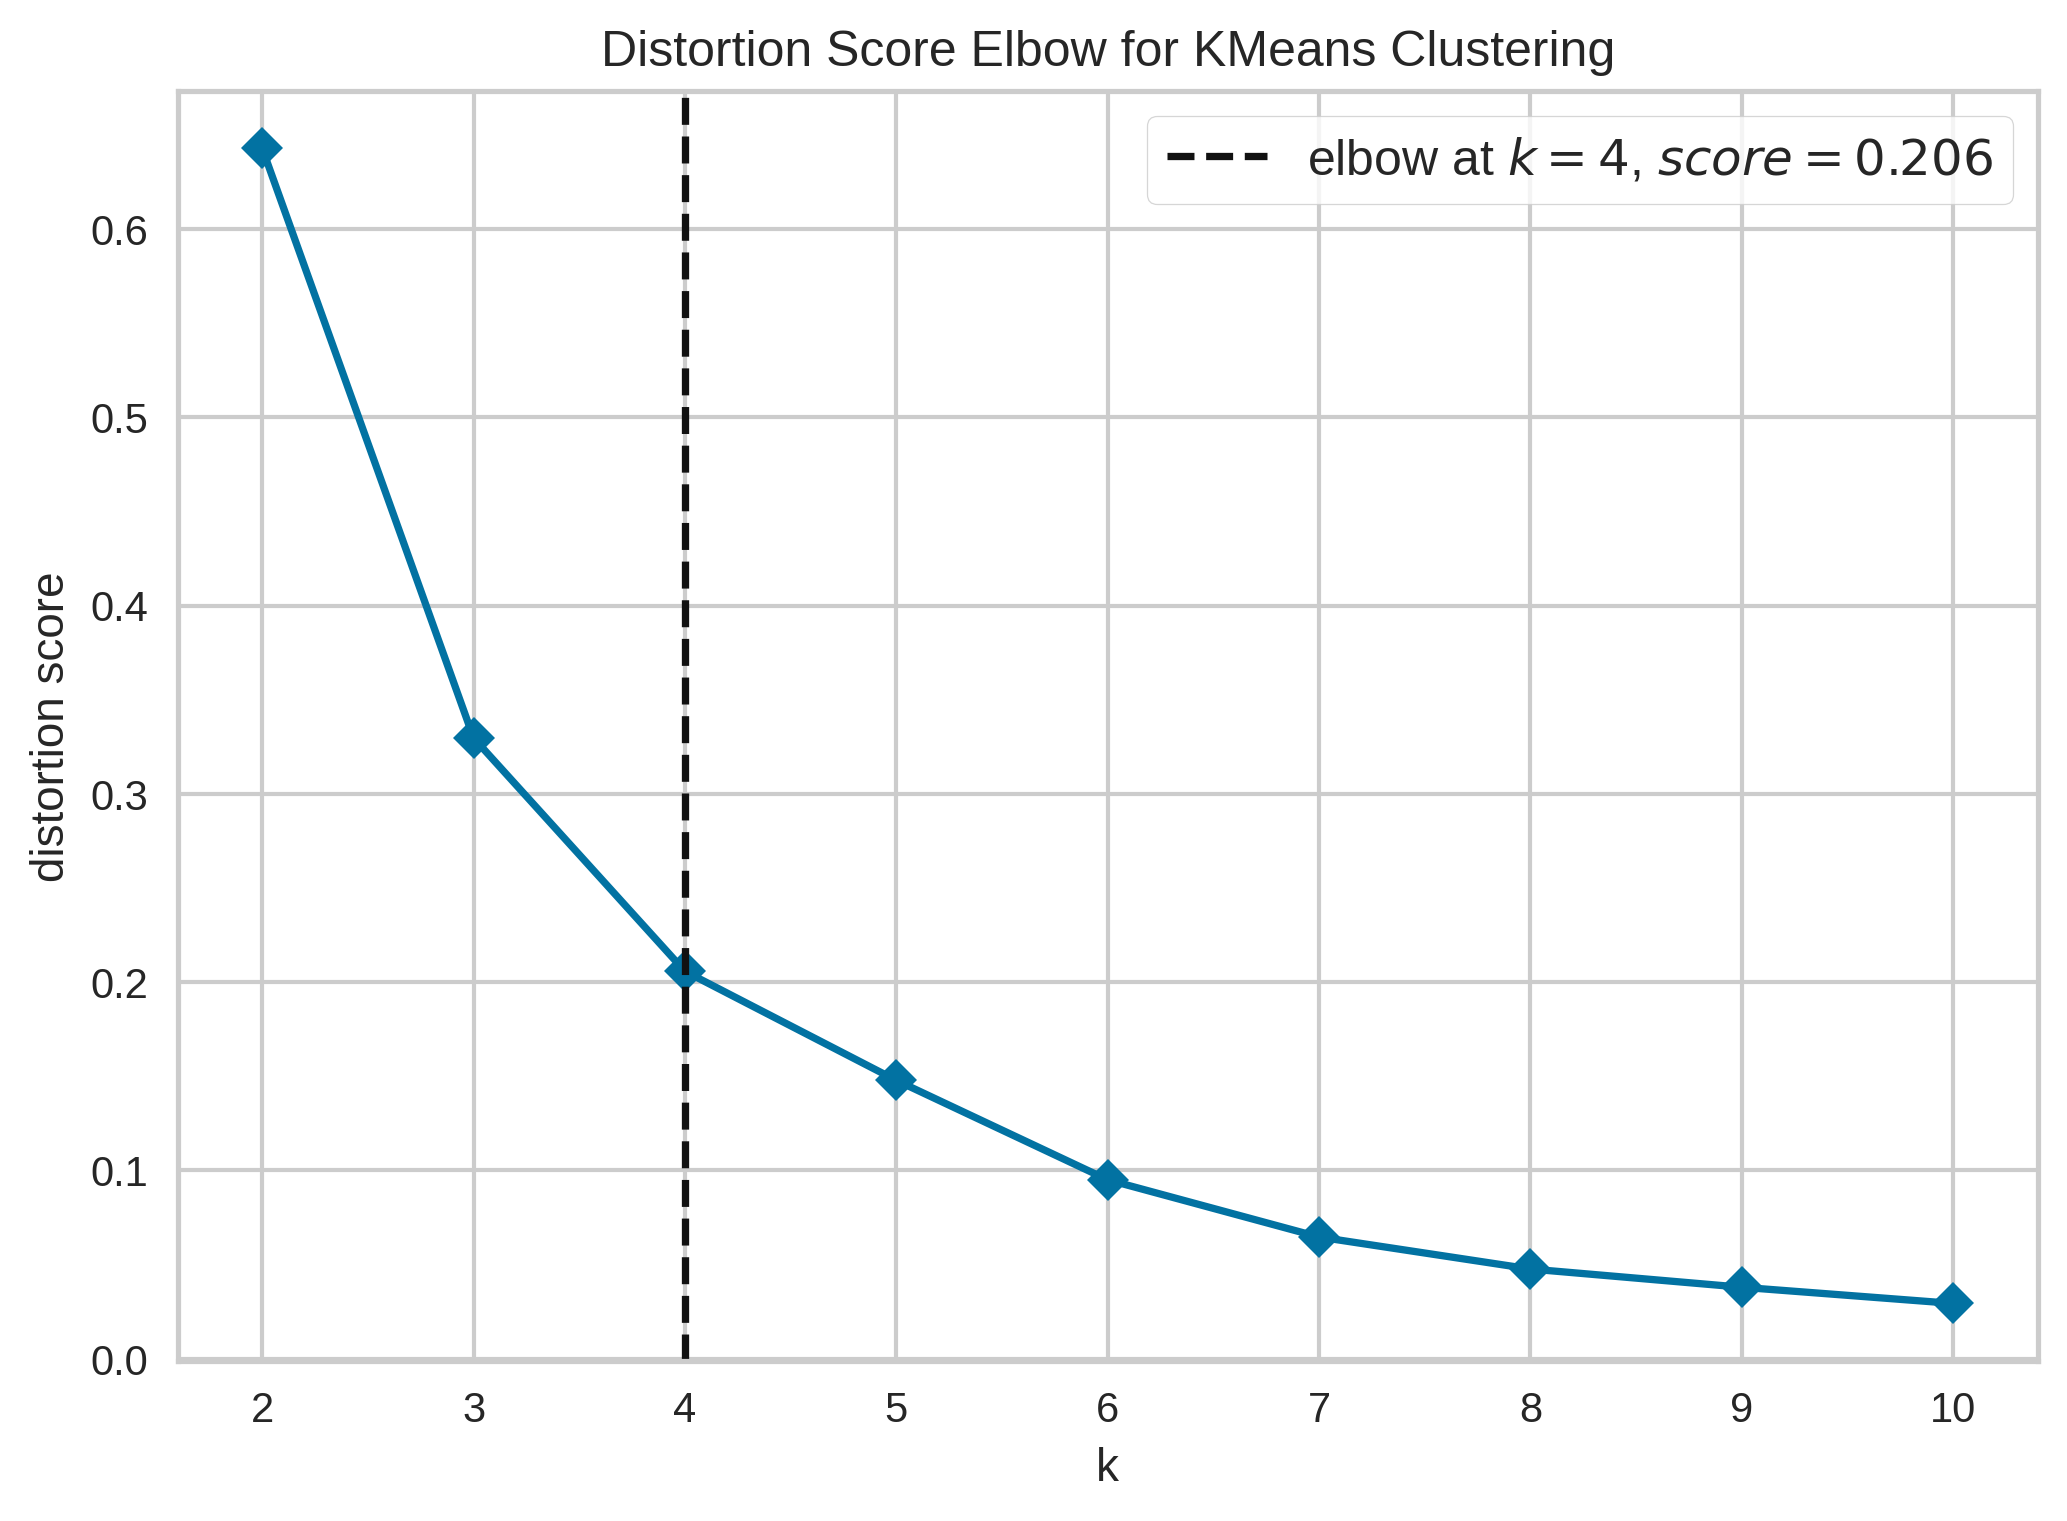

In [12]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [13]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [18]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, 'Region1-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5899,2683.1530,0.5324,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.496095,Cluster 1
1,0.458316,Cluster 3
2,0.469721,Cluster 1
3,0.473013,Cluster 1
4,0.472839,Cluster 1
5,0.450940,Cluster 3
6,0.488422,Cluster 1
7,0.489246,Cluster 1
8,0.470128,Cluster 1
9,0.465189,Cluster 3


In [17]:
model = create_model('kmeans', num_clusters = 2)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, 'Region1-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6708,2073.7350,0.4534,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.496095,Cluster 1
1,0.458316,Cluster 1
2,0.469721,Cluster 1
3,0.473013,Cluster 1
4,0.472839,Cluster 1
5,0.450940,Cluster 0
6,0.488422,Cluster 1
7,0.489246,Cluster 1
8,0.470128,Cluster 1
9,0.465189,Cluster 1


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results

,HCFAI,Accessibility Level
0,0.496095,Cluster 1
1,0.458316,Cluster 3
2,0.469721,Cluster 1
3,0.473013,Cluster 1
4,0.472839,Cluster 1
...,...,...
747,0.462566,Cluster 3
748,0.416949,Cluster 3
749,0.361776,Cluster 0
750,0.361038,Cluster 0


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):  # Assuming you have 3 clusters
    cluster_name = f"Cluster {cluster_number}"
    cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
    lists[cluster_name] = cluster_list

In [ ]:
for cluster_name, cluster_list in lists.items():
    print(f"{cluster_name}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

Cluster 0
max, min, total 0.4166029989719391 | 0.34985193610191345 | 354
Cluster 1
max, min, total 0.5309665203094482 | 0.46890491247177124 | 179
Cluster 2
max, min, total 0.6354666352272034 | 0.5321165323257446 | 54
Cluster 3
max, min, total 0.4678027927875519 | 0.41694945096969604 | 165


In [ ]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
539,0.635467,Cluster 2
487,0.634995,Cluster 2
567,0.634317,Cluster 2
686,0.626222,Cluster 2
528,0.599855,Cluster 2
...,...,...
684,0.353724,Cluster 0
692,0.353665,Cluster 0
731,0.349852,Cluster 0
722,0.349852,Cluster 0


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(1))
x = x.replace(['Cluster 3'],int(0))

In [ ]:
x['ID'] = IDdf
x

,HCFAI,Accessibility Level,ID
0,0.496095,0,2708537
1,0.458316,0,2720913
2,0.469721,0,2720914
3,0.473013,0,2722294
4,0.472839,0,2722295
...,...,...,...
747,0.462566,0,3410548
748,0.416949,0,3411930
749,0.361776,0,3411931
750,0.361038,0,3413311


In [ ]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
df

,ID,bg_id,barangay_name,city_name,province_name,region_name,RHU_Presence,Road_Presence,POI_Presence,buildability_landcov,...,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,Cluster,HCFAI_y,Accessibility Level
0,2708537,bg-39207,Likud Bakkao,Turtle Islands,Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,104.243678,51.920253,1248.510791,591.443039,367.084234,288.932149,0.496095,0,0.496095,0
1,2720913,bg-39123,Sikub,Mapun (Cagayan De Tawi-Tawi),Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,15.175698,9.350432,158.286798,77.030442,41.553380,32.278671,0.458316,1,0.458316,0
2,2720914,bg-39127,Erok-erok,Mapun (Cagayan De Tawi-Tawi),Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,41.641680,13.325326,225.790578,114.746040,52.005874,28.686510,0.469721,0,0.469721,0
3,2722294,bg-39118,Kompang,Mapun (Cagayan De Tawi-Tawi),Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,15.274236,13.876177,234.821835,112.514904,64.277047,54.170847,0.473013,0,0.473013,0
4,2722295,bg-39127,Erok-erok,Mapun (Cagayan De Tawi-Tawi),Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,45.674227,15.243871,253.780666,128.619432,58.794588,33.657194,0.472839,0,0.472839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,3410548,bg-38183,Mangadeg,Datu Paglas,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),0,1,1,0.0,...,30.284709,3.979050,203.250177,98.452593,48.810816,38.876259,0.462566,1,0.462566,0
748,3411930,bg-38181,Katil,Datu Paglas,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),1,1,0,0.0,...,37.031753,2.322891,164.729402,77.112762,38.189604,28.051106,0.416949,1,0.416949,0
749,3411931,bg-38185,Puya,Datu Paglas,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,28.308372,2.127528,162.692222,80.355348,38.575920,30.584196,0.361776,0,0.361776,0
750,3413311,bg-38181,Katil,Datu Paglas,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,6.946916,0.917463,63.715808,29.042843,16.319852,15.512167,0.361038,0,0.361038,0


In [ ]:
# df = df.drop(['Accessibility Level_x'], axis=1)
df.rename(columns = {'Accessibility Level':'Cluster'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,bg_id,barangay_name,city_name,province_name,region_name,RHU_Presence,Road_Presence,POI_Presence,buildability_landcov,...,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,Cluster,HCFAI_y,Cluster
0,2708537,bg-39207,Likud Bakkao,Turtle Islands,Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,104.243678,51.920253,1248.510791,591.443039,367.084234,288.932149,0.496095,0,0.496095,0
1,2720913,bg-39123,Sikub,Mapun (Cagayan De Tawi-Tawi),Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,15.175698,9.350432,158.286798,77.030442,41.553380,32.278671,0.458316,1,0.458316,0
2,2720914,bg-39127,Erok-erok,Mapun (Cagayan De Tawi-Tawi),Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,41.641680,13.325326,225.790578,114.746040,52.005874,28.686510,0.469721,0,0.469721,0
3,2722294,bg-39118,Kompang,Mapun (Cagayan De Tawi-Tawi),Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,15.274236,13.876177,234.821835,112.514904,64.277047,54.170847,0.473013,0,0.473013,0
4,2722295,bg-39127,Erok-erok,Mapun (Cagayan De Tawi-Tawi),Tawi-Tawi,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,45.674227,15.243871,253.780666,128.619432,58.794588,33.657194,0.472839,0,0.472839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,3410548,bg-38183,Mangadeg,Datu Paglas,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),0,1,1,0.0,...,30.284709,3.979050,203.250177,98.452593,48.810816,38.876259,0.462566,1,0.462566,0
748,3411930,bg-38181,Katil,Datu Paglas,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),1,1,0,0.0,...,37.031753,2.322891,164.729402,77.112762,38.189604,28.051106,0.416949,1,0.416949,0
749,3411931,bg-38185,Puya,Datu Paglas,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,28.308372,2.127528,162.692222,80.355348,38.575920,30.584196,0.361776,0,0.361776,0
750,3413311,bg-38181,Katil,Datu Paglas,Maguindanao,Autonomous Region In Muslim Mindanao (ARMM),0,0,0,0.0,...,6.946916,0.917463,63.715808,29.042843,16.319852,15.512167,0.361038,0,0.361038,0


In [ ]:
df.rename(columns = {'HCFAI_y':'HCFAI'}, inplace = True)
df = df.drop(['HCFAI_x'], axis=1)
df.to_csv(r'/content/drive/MyDrive/MS thesis/preliminary site selection/BARMM/barmm-clusters.csv')